In [ ]:
import pandas as pd
df = pd.read_csv(
    "Amazon_Reviews.csv",
    engine="python",
    on_bad_lines="warn"
)
df[['year', 'month', 'daytime']] = df['Review Date'].str.split('-', expand=True)
df[['month_ex', 'day_ex','year_ex']] = df['Date of Experience'].str.split(' ', expand=True)
df[['review count', 'extra']] = df['Review Count'].str.split(' ', expand=True)
df['rating'] = df['Rating'].str.split().str[1]
df['rating'] = pd.to_numeric(df['rating'])
df['review count'] = pd.to_numeric(df['review count'])



In [ ]:
#What the origional data looks like
df.head()

,Reviewer Name,Profile Link,Country,Review Count,Review Date,Rating,Review Title,Review Text,Date of Experience,year,month,daytime,month_ex,day_ex,year_ex,review count,extra,rating
0,Eugene ath,/users/66e8185ff1598352d6b3701a,US,1 review,2024-09-16T13:44:26.000Z,Rated 1 out of 5 stars,A Store That Doesn't Want to Sell Anything,"I registered on the website, tried to order a ...","September 16, 2024",2024,09,16T13:44:26.000Z,September,"16,",2024,1.0,review,1.0
1,Daniel ohalloran,/users/5d75e460200c1f6a6373648c,GB,9 reviews,2024-09-16T18:26:46.000Z,Rated 1 out of 5 stars,Had multiple orders one turned up and…,Had multiple orders one turned up and driver h...,"September 16, 2024",2024,09,16T18:26:46.000Z,September,"16,",2024,9.0,reviews,1.0
2,p fisher,/users/546cfcf1000064000197b88f,GB,90 reviews,2024-09-16T21:47:39.000Z,Rated 1 out of 5 stars,I informed these reprobates,I informed these reprobates that I WOULD NOT B...,"September 16, 2024",2024,09,16T21:47:39.000Z,September,"16,",2024,90.0,reviews,1.0
3,Greg Dunn,/users/62c35cdbacc0ea0012ccaffa,AU,5 reviews,2024-09-17T07:15:49.000Z,Rated 1 out of 5 stars,Advertise one price then increase it on website,I have bought from Amazon before and no proble...,"September 17, 2024",2024,09,17T07:15:49.000Z,September,"17,",2024,5.0,reviews,1.0
4,Sheila Hannah,/users/5ddbe429478d88251550610e,GB,8 reviews,2024-09-16T18:37:17.000Z,Rated 1 out of 5 stars,If I could give a lower rate I would,If I could give a lower rate I would! I cancel...,"September 16, 2024",2024,09,16T18:37:17.000Z,September,"16,",2024,8.0,reviews,1.0


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21214 entries, 0 to 21213
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Reviewer Name       21214 non-null  object 
 1   Profile Link        21163 non-null  object 
 2   Country             21054 non-null  object 
 3   Review Count        21055 non-null  object 
 4   Review Date         21055 non-null  object 
 5   Rating              21055 non-null  object 
 6   Review Title        21055 non-null  object 
 7   Review Text         21055 non-null  object 
 8   Date of Experience  20947 non-null  object 
 9   year                21055 non-null  object 
 10  month               21055 non-null  object 
 11  daytime             21055 non-null  object 
 12  month_ex            20947 non-null  object 
 13  day_ex              20947 non-null  object 
 14  year_ex             20947 non-null  object 
 15  review count        21055 non-null  float64
 16  extr

,review count,rating
count,21055.000000,21055.000000
mean,8.488720,2.186654
std,18.239247,1.676769
min,1.000000,1.000000
25%,1.000000,1.000000
50%,3.000000,1.000000
75%,8.000000,4.000000
max,633.000000,5.000000


/tmp/ipython-input-1233967791.py:5: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=5)


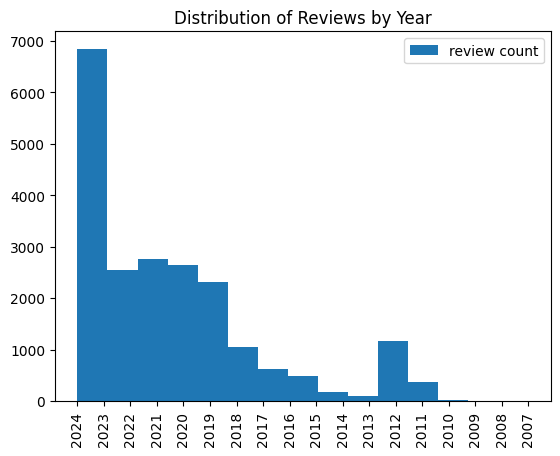

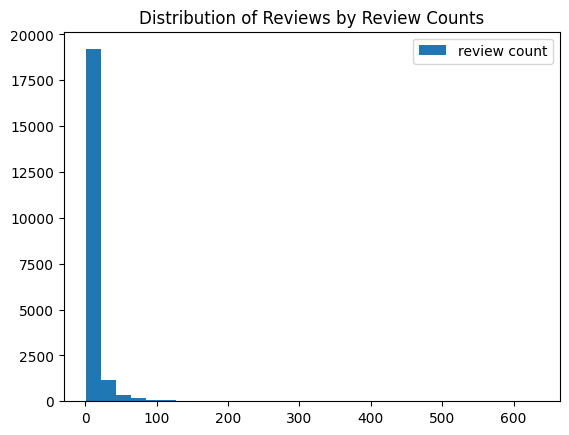

In [ ]:
import matplotlib.pyplot as plt
cols = ['year','review count']

plt.hist(df['year'].dropna(), bins=15, label=col)
plt.locator_params(axis='x', nbins=5)
plt.xticks(rotation=90)
plt.legend()
plt.title('Distribution of Reviews by Year')
plt.show()

plt.hist(df['review count'].dropna(), bins=30, label=col)
plt.legend()
plt.title('Distribution of Reviews by Review Counts')
plt.show()


by country by score to see if certain countries score lower

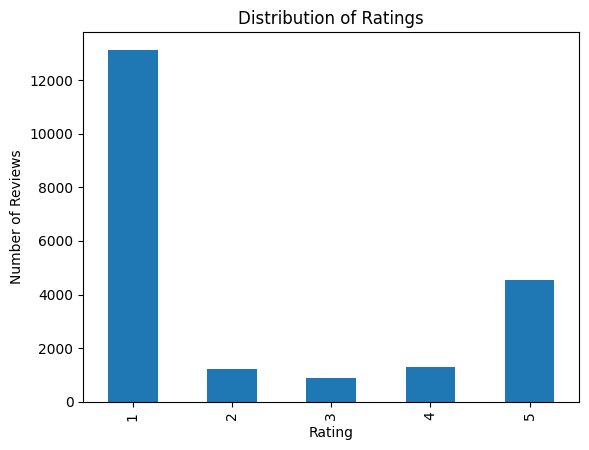

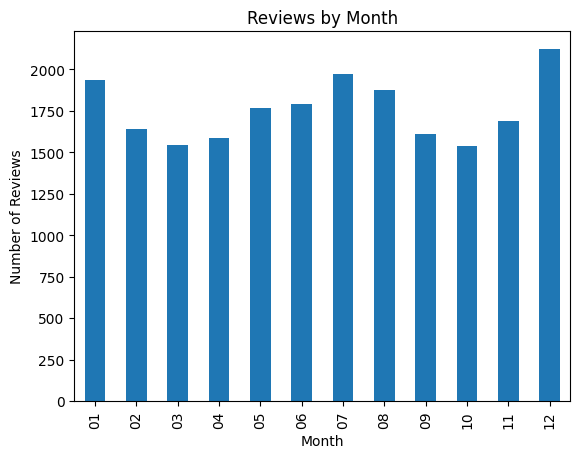

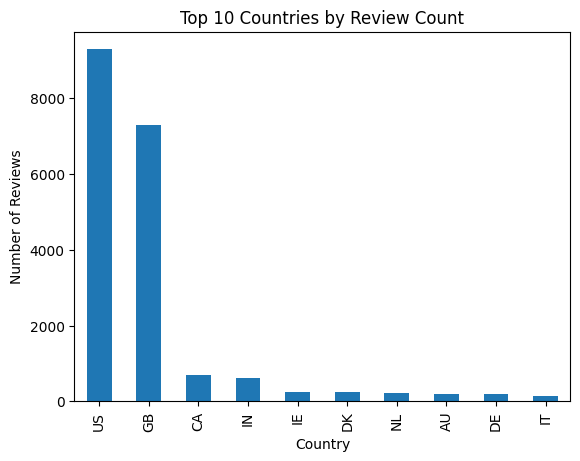

In [ ]:
df['rating'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Ratings')
plt.show()

df['month'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.title('Reviews by Month')
plt.show()

df['Country'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Reviews')
plt.title('Top 10 Countries by Review Count')
plt.show()

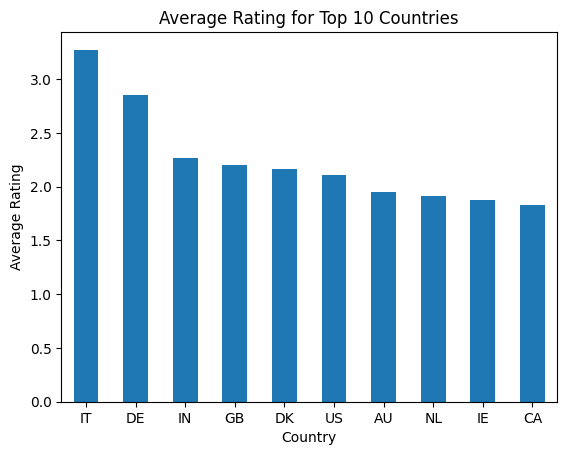

In [ ]:
top_countries = df['Country'].value_counts().head(10).index

df_topcountries = df[df['Country'].isin(top_countries)]

avg_rating = df_topcountries.groupby('Country')['rating'].mean().sort_values(ascending=False)
avg_rating.plot(kind='bar')

plt.xlabel('Country')
plt.ylabel('Average Rating')
plt.title('Average Rating for Top 10 Countries')
plt.xticks(rotation=0)
plt.show()



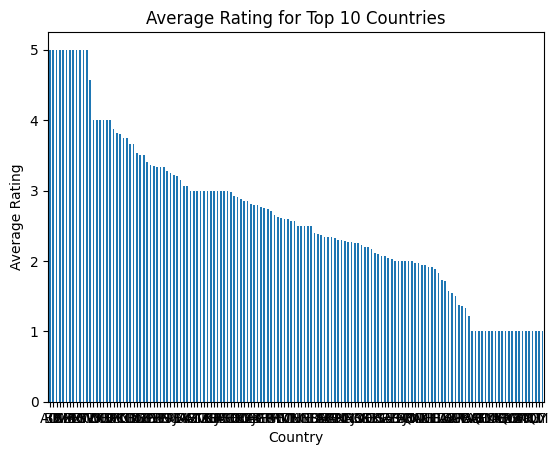

In [61]:
avg_rating = df.groupby('Country')['rating'].mean().sort_values(ascending=False)
avg_rating.plot(kind='bar')

plt.xlabel('Country')
plt.ylabel('Average Rating')
plt.title('Average Rating for Top 10 Countries')
plt.xticks(rotation=0)
plt.show()

In [ ]:
#cleaning the dataframe so it will only have nessesary columns
clean_df = df[['Country',
              'Review Title',
              'Review Text',
              'Date of Experience',
              'year',
              'month',
              'daytime',
              'month_ex',
              'day_ex',
              'year_ex',
              'review count',
              'rating'
]]
clean_df.head()

,Country,Review Title,Review Text,Date of Experience,year,month,daytime,month_ex,day_ex,year_ex,review count,rating
0,US,A Store That Doesn't Want to Sell Anything,"I registered on the website, tried to order a ...","September 16, 2024",2024,09,16T13:44:26.000Z,September,"16,",2024,1.0,1.0
1,GB,Had multiple orders one turned up and…,Had multiple orders one turned up and driver h...,"September 16, 2024",2024,09,16T18:26:46.000Z,September,"16,",2024,9.0,1.0
2,GB,I informed these reprobates,I informed these reprobates that I WOULD NOT B...,"September 16, 2024",2024,09,16T21:47:39.000Z,September,"16,",2024,90.0,1.0
3,AU,Advertise one price then increase it on website,I have bought from Amazon before and no proble...,"September 17, 2024",2024,09,17T07:15:49.000Z,September,"17,",2024,5.0,1.0
4,GB,If I could give a lower rate I would,If I could give a lower rate I would! I cancel...,"September 16, 2024",2024,09,16T18:37:17.000Z,September,"16,",2024,8.0,1.0


In [62]:
print(df.isna().sum())


Reviewer Name           0
Profile Link           51
Country               160
Review Count          159
Review Date           159
Rating                159
Review Title          159
Review Text           159
Date of Experience    267
year                  159
month                 159
daytime               159
month_ex              267
day_ex                267
year_ex               267
review count          159
extra                 159
rating                159
dtype: int64
